<a href="https://colab.research.google.com/github/Kemar73/Data-analysis-task/blob/master/Clustering_task_Data_Analysis_Marc_Duris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

Kaggle : https://www.kaggle.com/jeanmidev/crossfit-games#2019_games_athletes.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=pd.read_csv('/content/drive/My Drive/2019_games_athletes.csv')

In [5]:
df.head()

,height,affiliateid,countryoforiginname,weight,affiliatename,status,bibid,profilepics3key,competitorid,firstname,gender,age,lastname,countryoforigincode,competitorname,overallrank,overallscore,division
0,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,016,9e218-P153604_4-184.jpg,153604,Mathew,M,29,Fraser,US,Mathew Fraser,1,984.0,Men
1,1.74,44800.0,United States,86.2,Peak 360 CrossFit,ACT,302,0a0bc-P2725_5-184.jpg,2725,Noah,M,28,Ohlsen,US,Noah Ohlsen,2,949.0,Men
2,1.55,44753.0,Iceland,83.9,CrossFit Hengill,ACT,122,4c5dc-P81616_4-184.jpg,81616,Björgvin Karl,M,26,Guðmundsson,IS,Björgvin Karl Guðmundsson,3,888.0,Men
3,1.80,44597.0,United States,84.8,CrossFit Mentality,ACT,105,e23e0-P34796_8-184.jpg,34796,Scott,M,31,Panchik,US,Scott Panchik,4,795.0,Men
4,1.55,44792.0,Australia,87.1,CrossFit Mode,ACT,303,b7c6d-P16080_7-184.jpg,16080,James,M,28,Newbury,AU,James Newbury,5,728.0,Men


We only keep columns that we could need

In [0]:
# Remove some columns
cols=['height','countryoforiginname','weight','affiliatename','gender','age','countryoforigincode','overallrank','overallscore','division']
df.drop(df.columns.difference(cols), axis=1, inplace=True)

In [7]:
df.head()

,height,countryoforiginname,weight,affiliatename,gender,age,countryoforigincode,overallrank,overallscore,division
0,1.74,United States,88.5,CrossFit Mayhem,M,29,US,1,984.0,Men
1,1.74,United States,86.2,Peak 360 CrossFit,M,28,US,2,949.0,Men
2,1.55,Iceland,83.9,CrossFit Hengill,M,26,IS,3,888.0,Men
3,1.80,United States,84.8,CrossFit Mentality,M,31,US,4,795.0,Men
4,1.55,Australia,87.1,CrossFit Mode,M,28,AU,5,728.0,Men


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height               394 non-null    float64
 1   countryoforiginname  394 non-null    object 
 2   weight               394 non-null    float64
 3   affiliatename        357 non-null    object 
 4   gender               394 non-null    object 
 5   age                  394 non-null    int64  
 6   countryoforigincode  393 non-null    object 
 7   overallrank          394 non-null    object 
 8   overallscore         391 non-null    float64
 9   division             394 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 30.9+ KB


## Outliers

In [0]:
#Outliers 
def outliers_iqr(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    outliers = ((df[[feature]] < (q1 - 1.5 * iqr)) |(df[[feature]] > (q3 + 1.5 * iqr))).any(axis=1)
    return outliers

non_outliers = ~outliers_iqr(df, 'height')



# Features

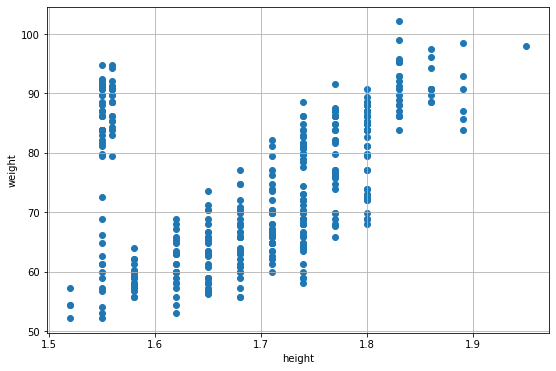

In [10]:
# Two features: height and weight
plt.figure(figsize=(9, 6))
plt.scatter(df[non_outliers]['height'], df[non_outliers]['weight'])
plt.xlabel('height')
plt.ylabel('weight')
plt.grid()

In [0]:
 # Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df[non_outliers][['height', 'weight']].values
X = scaler.fit_transform(X)

# K-means clustering

K-means clustering is an unsupervised machine learning algorithms.
The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

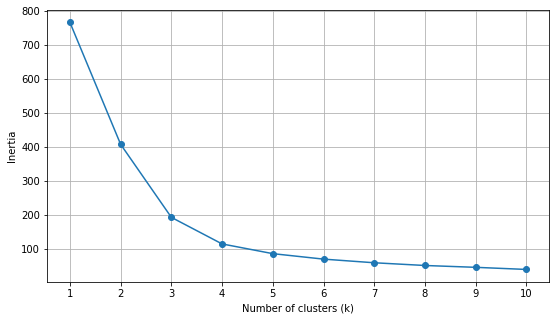

In [27]:
 # Inertia scores
inertia_scores = []
k_values = list(range(1, 10 + 1))
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X)
    inertia_scores.append(kmeans.inertia_)
    
plt.figure(figsize=(9, 5))
plt.plot(k_values, inertia_scores, marker='o')
plt.xticks(k_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()

2 or 3 clusters should be good. If we choose more clusers, the inertia start decreasing.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


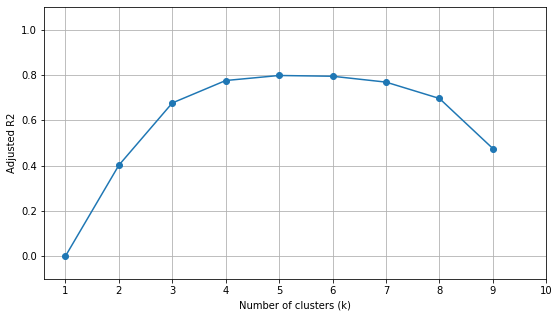

In [14]:
# Adjusted R2
n = max(k_values)
adjusted_r2_scores = [
    1 - ((inertia * (n - 1)) / (inertia_scores[0] * (n - k)))
    for inertia, k in zip(inertia_scores, k_values)
]

plt.figure(figsize=(9, 5))
plt.plot(k_values, adjusted_r2_scores, marker='o')
plt.xticks(k_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Adjusted R2')
plt.ylim([-0.1, 1.1])
plt.grid()

Like for the previous graph, we should choose 2 or 3 clusters.

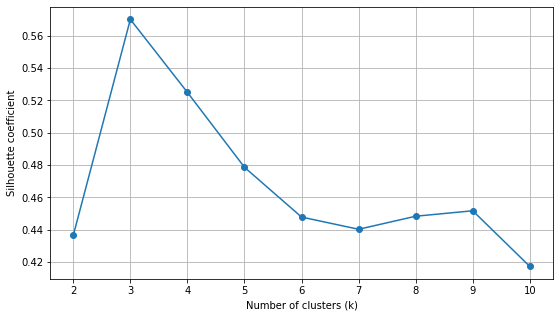

In [29]:
 # Silhouette coefficient
silhouette_scores = []
k_values = list(range(2, 10 + 1))
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X)
    score = silhouette_score(X, y_pred)
    silhouette_scores.append(score)

    
plt.figure(figsize=(9, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xticks(k_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette coefficient')
plt.grid()

3 clusters looks the best choose according to the method "silhouette coefficient".


### 2 clusters

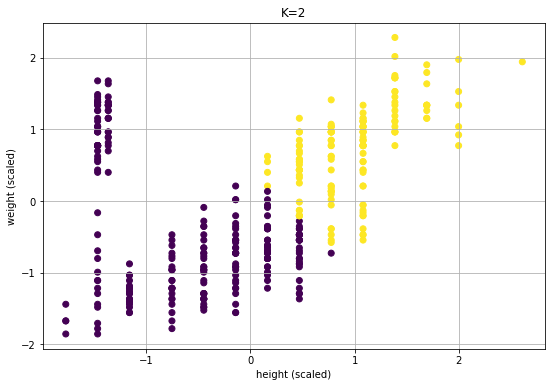

In [16]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2_pred = kmeans_2.fit_predict(X)

plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_2_pred)
plt.xlabel('height (scaled)')
plt.ylabel('weight (scaled)')
plt.title('K=2')
plt.grid()

### 3 clusters

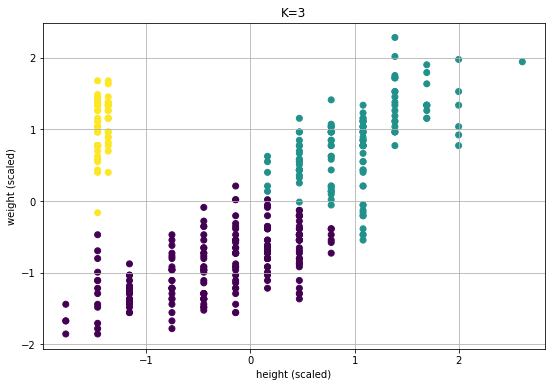

In [17]:
kmeans_3 = KMeans(n_clusters=3)
kmeans_3_pred = kmeans_3.fit_predict(X)

plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_3_pred)
plt.xlabel('height (scaled)')
plt.ylabel('weight (scaled)')
plt.title('K=3')
plt.grid()

# Interpretation


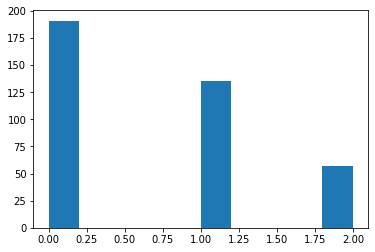

In [30]:
# Cluster sizes
plt.figure()
plt.hist(kmeans_3_pred)
plt.show()

In [31]:
# Cluster centers
# Note the reverse of scaling operation!
scaler.inverse_transform(
    kmeans_3.cluster_centers_)

array([[ 1.66418848, 63.95602094],
       [ 1.79488889, 84.34296296],
       [ 1.55385965, 87.05263158]])

Here we have our 3 cluster centers, height on the left, weight on the right.



# Hierarchical clustering


We try here to fing relatively homogeneous clusters of cases based on measured characteristics.

In [0]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

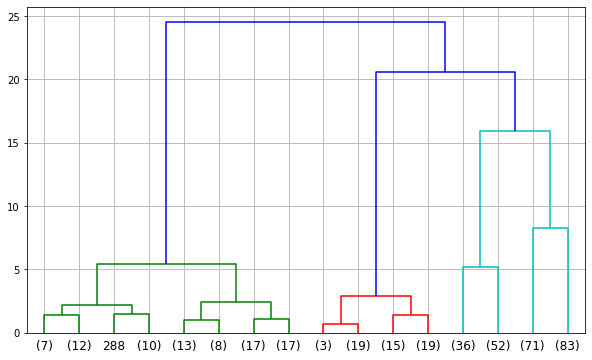

In [22]:
 from sklearn.cluster import AgglomerativeClustering

# Default linkage method is Ward
hc0 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hc0.fit(X)

plt.figure(figsize=(10, 6))
plot_dendrogram(hc0, truncate_mode='level', p=3)
plt.grid()

In [0]:
 # Specifying distance threshold instead of number of clusters:
hc = AgglomerativeClustering(distance_threshold=25, n_clusters=None)
hc_pred = hc.fit_predict(X)

# Optimal number of clusters could also be determined by 
# largest vertical distance which does not intersect any other clusters.

# Interpretation

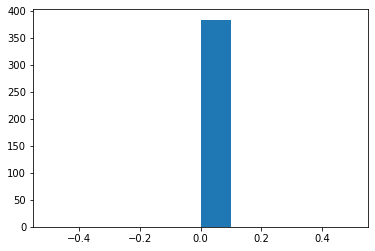

In [33]:
# Cluster sizes
plt.figure()
plt.hist(hc_pred)
plt.show()